# Testing MCMC for fitting with the emcee package

This notebook is based on the emcee fitting tutorial which can be found on:
http://dan.iel.fm/emcee/current/user/line/

In [2]:
#### run imports
%run "Initialize.ipynb"
matplotlib.rc('font', size=20)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (10.0, 10.0)    # ... and big plots
plt.set_cmap('viridis')
from hax import misc
%pylab inline
from iminuit import Minuit, describe, Struct

plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.set_cmap('viridis')

from pathlib import Path
import os
os.environ['MPLCONFIGDIR'] = '/project/lgrandi/xenon1t/mplconfigs/'
if not Path(matplotlib.get_configdir()+'/stylelib').exists(): 
    os.mkdir(matplotlib.get_configdir()+'/stylelib') 
    with open(matplotlib.get_configdir()+'/stylelib/SR0.mplstyle', 'w') as f: 
        f.write(style) 
        # use the style 
plt.style.use(matplotlib.get_configdir()+'/stylelib/SR0.mplstyle')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.linestyle'] = '-'

Populating the interactive namespace from numpy and matplotlib


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [383]:
from IPython.display import HTML

def Init_HTML_additions(maxlevel=3, attribution=''):
    """
    Adds a floating code hider button and table of content to the top right of the notebook. Only the first apperance of equal headlines is linked. This can also be used to add a table of content somewhere in a markdown cell.

    To add a table of content in a markdown cell use the following code:
        <h2 id="tocheading">Table of Content</h2>
        <div id="tocinline"></div>
    
    Args:
        maxlevel: Set the max level to which headlines are added. (default: maxlevel=3)
        attribution: This will add a footer with you desired string. (default: attribution='')
    """
    if attribution == 'LA': attribution = 'Created by Lutz Althüser for the XENON collaboration.'
    return HTML('''<script>
// Converts integer to roman numeral
function romanize(num) {
    var lookup = {M:1000,CM:900,D:500,CD:400,C:100,XC:90,L:50,XL:40,X:10,IX:9,V:5,IV:4,I:1},
    roman = '',
        i;
    for ( i in lookup ) {
        while ( num >= lookup[i] ) {
        roman += i;
        num -= lookup[i];
        }
    }
    return roman;
}

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

// Builds a <ul> Table of Contents from all <headers> in DOM
function createTOC(toc_tag){
    var toc = "";
    var level = 0;
    var maxlevel = 1 + %s;
    var levels = {};
    $('#'+toc_tag).html('');

    $(":header").each(function(i){
        if (this.id=='tocheading'){return;}
        if (this.tagName[1] >= maxlevel){return;}
        
        var titleText = this.innerHTML;
        var openLevel = this.tagName[1];

        if (levels[openLevel]){
        levels[openLevel] += 1;
        } else{
        levels[openLevel] = 1;
        }

        if (openLevel > level) {
        toc += (new Array(openLevel - level + 1)).join('<ul class="'+toc_tag+'">');
        } else if (openLevel < level) {
        toc += (new Array(level - openLevel + 1)).join("</ul>");
        for (i=level;i>openLevel;i--){levels[i]=0;}
        }

        level = parseInt(openLevel);

        if (this.id==''){this.id = this.innerHTML.replace(/ /g,"-")}
        var anchor = this.id;

        toc += '<li><a href="#' + escape(anchor) + '">'
        + romanize(levels[openLevel].toString()) + '. ' + titleText
        + '</a></li>';
        
    });
    
    if (level) {
    toc += (new Array(level + 1)).join("</ul>");
    }
 
    $('#'+toc_tag).append(toc);
};

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

// Executes the createTOC_inline function
setTimeout(function(){createTOC('tocinline');},1000);
setTimeout(function(){createTOC('tocinline');},5000);
setTimeout(function(){createTOC('tocinline');},15000);

// Rebuild TOC_inline every 5 minutes
setInterval(function(){createTOC('tocinline');},300000);

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

$('<div id="toc"></div>').css({position: 'fixed', top: '160px', right: 20, background: "rgba(255, 255, 255, 0.6)"}).appendTo(document.body);
$("#toc").css("z-index", "2000");

// Executes the createToc function
setTimeout(function(){createTOC('toc');},100);
setTimeout(function(){createTOC('toc');},5000);
setTimeout(function(){createTOC('toc');},15000);

// Rebuild TOC every 5 minutes
setInterval(function(){createTOC('toc');},300000);

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

function toc_toggle() {
 if ($('#toc').is(':visible')){
     $('#toc').hide('500');
     $('#tocButton').val('Show table of content')
 } else {
     $('#toc').show('500');
     $('#tocButton').val('Hide table of content')
 }
} 

if (!($('#tocButton').length)) {
    $('<form action="javascript:toc_toggle()"><input type="submit" id="tocButton" value="Hide table of content"></form>').css({position: 'fixed', top: '135px', right: 20, background: "rgba(255, 255, 255, 0.6)"}).appendTo(document.body);
} else {
    $('#tocButton').val('Hide table of content')
}

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

function code_toggle() {
 if ($("div.input").is(':visible')){
     $("div.input").hide('500');
     $('#CodeButton').val('Show all Code')
     $('#CodeButton_inline').val('Show all code in this notebook')
 } else {
     $("div.input").show('500');
     $('#CodeButton').val('Hide all Code')
     $('#CodeButton_inline').val('Hide all code in this notebook')
 }
} 

$( document ).ready(function(){ $('div.input').hide() });

if (!($('#CodeButton').length)) {
    $('<form action="javascript:code_toggle()"><input type="submit" id="CodeButton" value="Show all code"></form>').css({position: 'fixed', top: '110px', right: 20, background: "rgba(255, 255, 255, 0.6)"}).appendTo(document.body);
} else {
    $('#CodeButton').val('Show all Code')
}

$('<div id="attribution_footer" style="float:right; color:#999; background:#fff;"> </div>').css({position: 'fixed', bottom: '0px', right: 20}).appendTo(document.body);
$('#attribution_footer').html('%s');

</script>

<form action="javascript:code_toggle()"><input type="submit" id="CodeButton_inline" value="Show all code in this notebook"></form>

''' % (maxlevel, attribution))

Init_HTML_additions(maxlevel=3, attribution='LA')


In [384]:
def linear(x,params=[1,0]):
    return np.add(np.multiply(x,params[0]),params[1])


# Here you put in data and a function with functionparams
def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    return (chisquarevalue, ndf)



## Make toy data for a linear model with underestimated errors

Our model is a simple linear function

$f(x) = a \cdot x +b$

where we randomly scatter the $y$-values around the true function and underestimate their errors. By doing this we can for once be as evil as the real world is. Hahahahaha... 

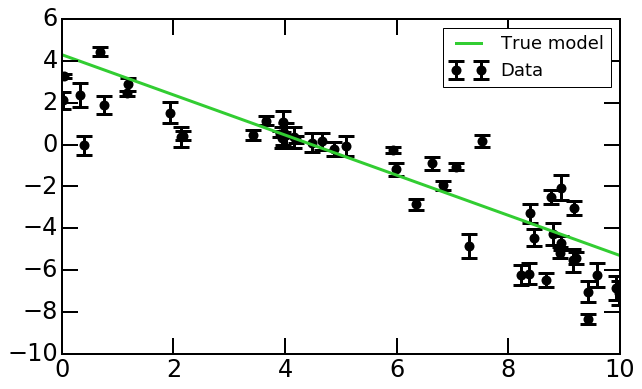

In [385]:
# Choose the "true" parameters.
a_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.figure()
plt.errorbar(x,y,yerr,linestyle='',marker='o',markersize=10,markeredgecolor='none', label='Data', c='black')
plt.plot(x,linear(x,[a_true,b_true]), label='True model', c='limegreen')
plt.legend(fontsize=18)
plt.show()

## Least squares fit
Now try a least squares fit ($\chi^2$ with iMinuit) and check what happens when we have to deal with underestimated errors. One thing that is for sure is that the reduced $\chi^2$ will be enormous.

The initial parameters are:


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: errordef is not given. Default to 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,3,1,0,0,,,
2,b,4.5,1,0,0,,,


Now proceed with the fit.


FCN = 1040.2087315704462 
 TOTAL NCALL = 0 
 NCALLS = 34 
 
 
 EDM = 8.984017702921463e-21 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,-0.890317,0.0121914,0,0,,,
2,b,3.67641,0.0656292,0,0,,,


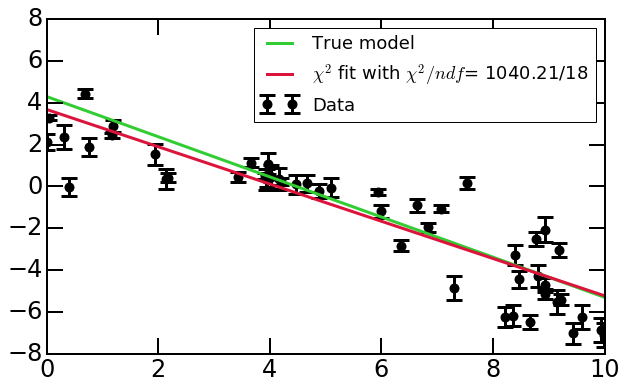

+,a,b
a,1.00,-0.81
b,-0.81,1.00


In [397]:
def linear_chisquare(a,b):
    return chisquare_1d(linear,[a,b],x,y,yerr)[0]

describe(linear_chisquare) # What does minuit see?

m=Minuit(linear_chisquare, a=3., b=4.5)
print('The initial parameters are:')
m.print_param()
print('Now proceed with the fit.')
m.migrad()

plt.figure()
plt.errorbar(x,y,yerr,linestyle='',marker='o',markersize=10,markeredgecolor='none', label='Data', c='black')
plt.plot(x,linear(x,[a_true,b_true]), label='True model', c='limegreen')
plt.plot(x,linear(x,m.args), label=('$\chi^2$ fit with $\\chi^2/ndf$= %5.2f/18' % m.fval),c='crimson')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(-8,8)
plt.show()

m.print_matrix()

The fit does not look too unreasonable, but the fit parameters show too small uncertainties to agree with the true values. This is due to the small error bars on the data points causing a high slope in the $\chi^2$ function, i.e. the minimized function increases fast. Accordingly, the 1$\sigma$ deviation ($\chi^2 = \chi^2_{min}+1$)of the parameter is reached quickly.

## Likelihood fit

A maximum likelihood result and a least squares solution conform for models where the error bars are assumed correct, Gaussian and independent. We know, of course, that this isn’t true in this case. Unfortunately, there isn’t a generalization of least squares that supports a model like the one that we know to be true. Instead, we need to write down the likelihood function and numerically optimize it. In mathematical notation, the correct log-likelihood function is:

$$\ln p(y\; |\; x,\sigma,a,b,f)=−\frac{1}{2}\sum_n\left(\frac{(y_n−a\cdot x_n−b)^2}{s^2_n}+\ln(2\pi s^2_n)\right).$$

In the normalization factor for the summands

$$s^2_n = \sigma^2_n + f^2 \cdot (a\cdot x +b)^2 $$

we take into account that the errors $\sigma_n$ are underestimated by a constant factor $f$. Now we maximize this likelihood. This corresponds to minimizing the negative likelihood with MINUIT.

In [387]:
def loglikelihood(function, functionparams, f, data_x, data_y,data_y_error):
    # In this function f is the factor 
    sn2=np.add(np.power(data_y_error,2),np.power(np.multiply(np.exp(np.log(f)),function(data_x,functionparams)),2))
    logli=-np.multiply(0.5,np.sum(np.add(np.divide(np.power(np.subtract(function(data_x,functionparams),data_y),2),sn2),np.log(2*np.pi*sn2))))
    neglogli=-logli #If you want to maximize the log-likelihood you have to minimize the negative log-likelihood.
    return (logli,neglogli)

def linearlikelihood(a,b,f):
    return loglikelihood(linear,[a,b],f,x,y,yerr)[1]

The initial parameters are:


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:3: InitialParamWarning: errordef is not given. Default to 1.
  app.launch_new_instance()
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:3: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  app.launch_new_instance()
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:3: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  app.launch_new_instance()
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:3: InitialParamWarning: Parameter f is floating but does not have initial step size. Assume 1.
  app.launch_new_instance()


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,-1.05,1,0,0,,,
2,b,3.8,1,0,0,,,
3,f,0.5,1,0,0,,,


Now proceed with the fit.


FCN = 76.4516765433871 
 TOTAL NCALL = 0 
 NCALLS = 76 
 
 
 EDM = 6.945256747622546e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,-0.876145,0.101687,0,0,,,
2,b,3.87483,0.474242,0,0,,,
3,f,0.518224,0.105372,0,0,,,


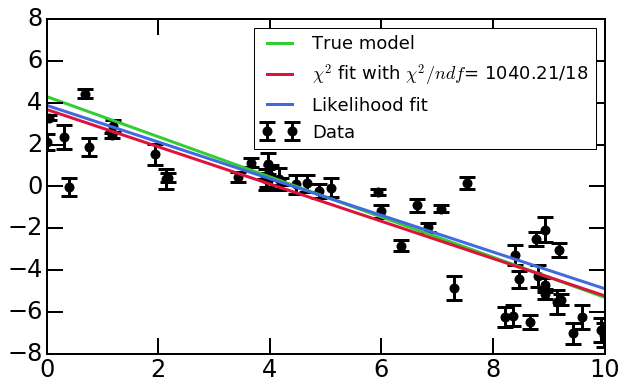

+,a,b,f
a,1.00,-0.96,0.57
b,-0.96,1.00,-0.52
f,0.57,-0.52,1.00


In [398]:
describe(linearlikelihood) # What does minuit see?

l=Minuit(linearlikelihood, a=-1.05, b=3.8, f=0.5)
print('The initial parameters are:')
l.print_param()
print('Now proceed with the fit.')
l.migrad()

plt.figure()
plt.errorbar(x,y,yerr,linestyle='',marker='o',markersize=10,markeredgecolor='none', label='Data', c='black')
plt.plot(x,linear(x,[a_true,b_true]), label='True model', c='limegreen')
plt.plot(x,linear(x,m.args), label=('$\chi^2$ fit with $\\chi^2/ndf$= %5.2f/18' % m.fval),c='crimson')
plt.plot(x,linear(x,l.args), label=('Likelihood fit'),c='royalblue')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(-8,8)
plt.show()

l.print_matrix()

Looking at different random datasets with the same true parameters one sees that the likelihood fit is generally closer to the true model. Still, there are a few things that we have to consider now. 
1. We now have a third fit parameter $f$ now which gives us a handle on how we underestimated the parameter errors (if there is a systematic underestimation). But we are not actually interested in $f$.
2. How do we obtain the errors for $a$ and $b$ now? Do we trust MINUIT? The errors of these parameters of interest are after all correlated with our "nuisance parameter" $f$. Although we are not interested in the value of $f$ we should maybe propagate its error to our estimates of $a$ and $b$.

We want to know the posterior probability functions of $a$ and $b$. These are the distributions of $a$ and $b$ (the parameters) that are consistent with our data. At the same time we would like to marginalize $f$ our nuisance parameter. This is where Markov Chain Monte Carlo (MCMC) comes in.

## MCMC fit

The posterior probability function, i.e. the probability for the parameters $a$, $b$ and $f$ given a specific dataset with $x$, $y$ and $\sigma$ is defined as

$$p(a,b,f\;|\;x,y,\sigma)\propto p(a,b,f)\cdot p(y\;|\;x,\sigma,a,b,f).$$

It includes the likelihood function defined above as well as the prior function

$$p(a,b,f)$$

which contains all our previous knowledge about the fit parameters. Such knowledge can result from previous experiments as well as physically acceptable parameter ranges. Whenever we want to use MCMC we have to write down a prior. With our bare hands. 

"Why is that so?"

MCMC is like that dude from your high school maths book who really likes to draw stuff out of bags with marbles/dirty socks/rabbit-filled top hats. It draws samples from a probability distribution and this should of course be the probability distribution for our parameters.

"Could we draw samples from the likelihood function? It is defined already and we are lazy asses."

No, that is not possible. The likelihood function is a distribution over datasets which is conditioned on model parameters. Therefore, you can draw representative datasets which are conditioned on model parameters. However, you cannot draw parameter samples.

We start by defining a uniform (non-informative) prior:

In [425]:
def lnprior(f,params):
    a,b,c = params[0],params[1],f
    if -5.0 < a < 0.5 and 0.0 < b < 10.0 and -10.0 < np.log(c) < 1.0:
        return 0.0
    return -np.inf

Now for the posterior likelihood. In this case we use the positive log likelihood because we do not run through the MINUIT minimizer.

In [426]:
# In the probability function we have to substitue a,b,f with a list/array theta as this is what emcee takes as an input.
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta[2],[theta[0],theta[1]])
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood(linear,[theta[0],theta[1]],theta[2], x, y, yerr)[0]

describe(lnprob)

['theta', 'x', 'y', 'yerr']

Now import the emcee and corner packages. We initialize the walkers in a tiny Gaussian ball (one normal distribution for each of the three parameters) around the result from the maximum likelihood fit. Then we run the MCMC for 500 steps around the ball.

In [427]:
import emcee # MCMC module
import corner # Corner plot module

ndim, nwalkers = 3, 100
pos = [l.args + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x,y,yerr))
sampler.run_mcmc(pos, 500)

(array([[-0.95463866,  4.21546389,  0.55343121],
        [-0.96931706,  4.31872717,  0.41918905],
        [-0.8839441 ,  3.90616391,  0.40725702],
        [-0.81414115,  3.62268572,  0.5939971 ],
        [-0.94408923,  4.08353027,  0.5177014 ],
        [-0.82416744,  3.59177031,  0.5317674 ],
        [-1.07340072,  4.77377753,  0.3789735 ],
        [-0.84130916,  3.65237326,  0.6017167 ],
        [-0.99614861,  4.34190919,  0.49895927],
        [-0.88130398,  3.88927889,  0.56465074],
        [-0.90326801,  3.90022678,  0.55586117],
        [-0.74494613,  3.45291348,  0.58722398],
        [-0.85834402,  3.74441744,  0.62427933],
        [-0.88582406,  3.97658582,  0.4331932 ],
        [-0.97371773,  4.27186358,  0.46298359],
        [-0.8221516 ,  3.68042511,  0.58212055],
        [-0.88040468,  3.91964875,  0.50114557],
        [-0.8657514 ,  3.75254905,  0.56027499],
        [-0.77589936,  3.28073598,  0.59030426],
        [-0.98635949,  4.30532409,  0.44043992],
        [-0.79989555

100
500
3


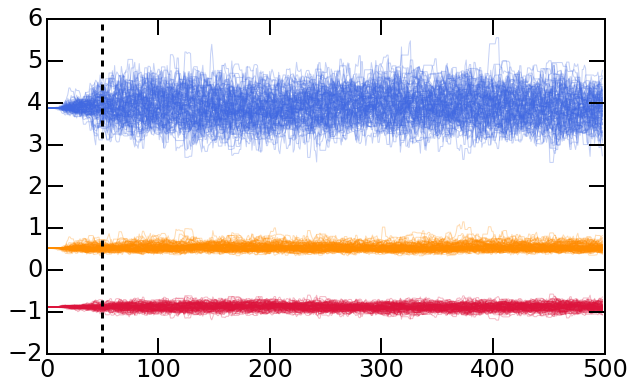

In [428]:
print(len(sampler.chain)) #number of the walkers
print(len(sampler.chain[99])) # number of the steps
print(len(sampler.chain[99][499])) # number of the parameters

# Now make a plot for each walker and parameter

nstep=np.arange(0,499,1)
for i in range(0,99,1):
    tempwalker_a=[]
    tempwalker_b=[]
    tempwalker_c=[]
    for j in range(0,499,1):
        tempwalker_a.append(sampler.chain[i][j][0])
        tempwalker_b.append(sampler.chain[i][j][1])
        tempwalker_c.append(sampler.chain[i][j][2])
    plt.plot(nstep,tempwalker_a,c='crimson',alpha=0.3,linewidth=1)
    plt.plot(nstep,tempwalker_b,c='royalblue',alpha=0.3,linewidth=1)
    plt.plot(nstep,tempwalker_c,c='darkorange',alpha=0.3,linewidth=1)

plt.axvline(50,linestyle='--',color='black')
plt.show()

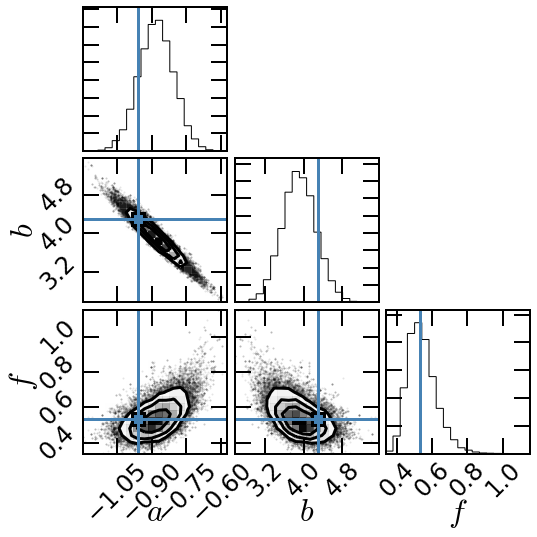

In [429]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$a$", "$b$", "$f$"],
                      truths=[a_true, b_true, (f_true)])
fig.savefig("triangle.png")

(-8, 8)

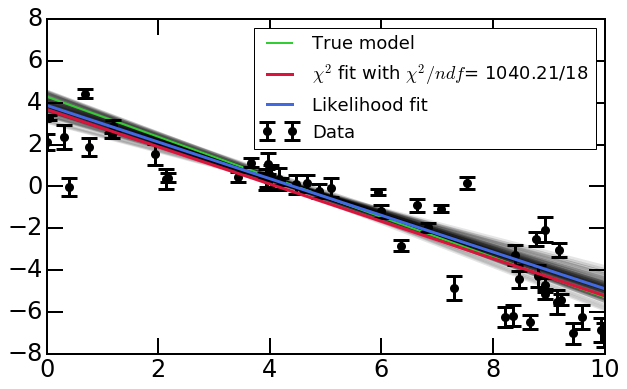

In [434]:
xl = np.array([0, 10])
for a, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, a*xl+b, color="black", alpha=0.1)
plt.plot(xl, a_true*xl+b_true, color="limegreen", lw=2, alpha=1,label='True model')
plt.errorbar(x, y, yerr=yerr, fmt=".k",label='Data')
plt.plot(x,linear(x,m.args), label=('$\chi^2$ fit with $\\chi^2/ndf$= %5.2f/18' % m.fval),c='crimson')
plt.plot(x,linear(x,l.args), label=('Likelihood fit'),c='royalblue')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(-8,8)

In [431]:
samples[:, 2] = np.exp(samples[:, 2])
a_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

print(a_mcmc)
print(b_mcmc)
print(f_mcmc)

(-0.87984093434427046, 0.076242824619024652, 0.07553053409708721)
(3.9051779788138128, 0.35326394240456382, 0.34787717781208416)
(1.7076198741244599, 0.15491522738525165, 0.11350963502704237)
